<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Linear Regression of  <br> <br> <br> Red Wine Data Set   


### Source file credit: Cortez et al., 2009
### Files archived at UCI Machine Learning Repository
### https://archive.ics.uci.edu/ml/datasets/wine

# Initial exploration of the dataset

In [46]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import chardet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [47]:
# look at the first ten thousand bytes to guess the character encoding
with open("C:/Users/Dave Jack/Desktop/python4ds/Wine_Quality_Dataset/winequality-red.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [48]:
data = pd.read_csv('C:/Users/Dave Jack/Desktop/python4ds/Wine_Quality_Dataset/winequality-red.csv',sep=';')
data.shape

(1599, 12)

In [49]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
# Any missing data???
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
dtype: int64

### Looks like a clean file!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208E1A1EB38>]], dtype=object)

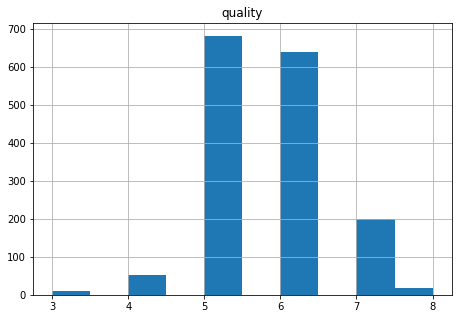

In [51]:

%matplotlib inline

data.hist(column='quality', figsize=(7.5,5))

### Note to self: This histogram of our Target Variable suggests we have a non-normal distribution. Consider normalization **after** attempting regression(but not this time)


### Sort features from target variable

In [52]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [53]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [54]:
target = ['quality']

### Place features in the x-axis and data in the y-axis (think y=f(x))

In [55]:
x = data[features]

In [56]:
y =  data[target]

In [202]:
x.iloc[2]

fixed acidity            7.800
volatile acidity         0.760
citric acid              0.040
residual sugar           2.300
chlorides                0.092
free sulfur dioxide     15.000
total sulfur dioxide    54.000
density                  0.997
pH                       3.260
sulphates                0.650
alcohol                  9.800
Name: 2, dtype: float64

In [57]:
y.describe()

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


In [58]:
##List unique values in the df['name'] column
#df.name.unique()
y.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Food for thought: The quality ranges from 3 to 8. This offers a fairly small dynamic range. Issues?? Can we artificially boost this range???

# Linear Regression...Lets Begin!  

### Split the set into Training and Test Data

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=324)

### Fit a model to the training data

In [60]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Test the prediction model

In [61]:
y_prediction = regressor.predict(x_test)


### OK! Now how does our prediction compare?

In [62]:
y_test.describe()

,quality
count,80.000000
mean,5.637500
std,0.679608
min,4.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,7.000000


### Find error based on Root Mean Squared Error

In [63]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [64]:
print(RMSE)

0.5718402334161701


## Our first pass at linear regression saw an RSME of 0.6225 using a split of 0.33.  

## Seems good but what happens if we normalize the dataset?
## Looks like we get  a tuple if we normalize Y and an error do to negative values is we normalize the whole data set. Live and learn! 

## Original test size was 0.33. Is this Ideal? Probably not. 

## Below is RMS data for various splits

## lets graph this out and find the minima

In [65]:
error_data = {'split': [0.01,0.02,0.03,0.04,0.045,0.05,0.1,0.2,0.3,0.33,0.4], 'RMS Error': [0.770381,0.667725,0.630343,0.603838,0.587076,0.571840,0.586878,0.607750,0.61872,0.6225,0.6332]}
err_df = pd.DataFrame(data=error_data)

   

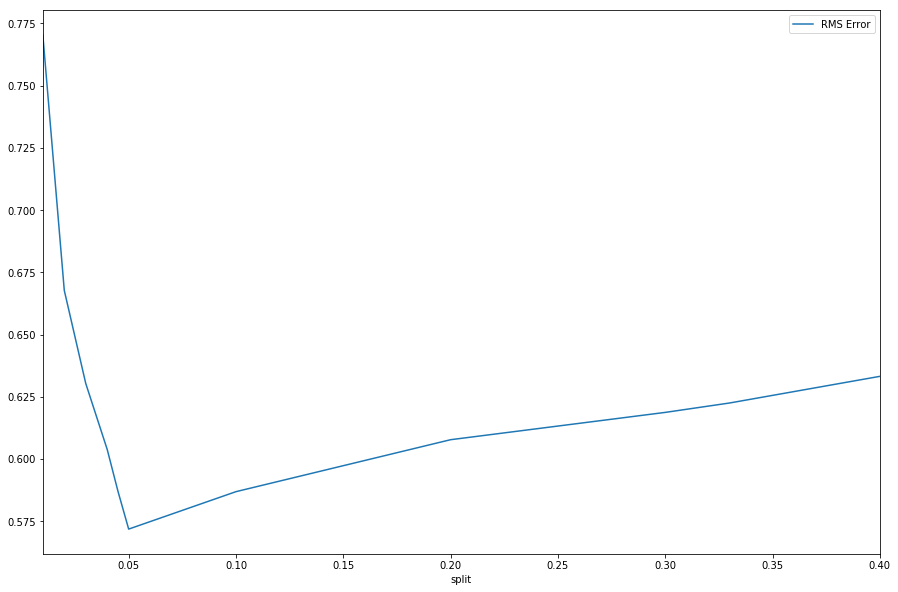

In [66]:
err_df.plot(kind='line',x='split',y='RMS Error', figsize=(15,10))

#plot(kind='bar', figsize=(15,10))


## Our best split rate is 0.05


## Using linear regression to predict wine quality, our lowest RSME of 0.5718. 


## Find Percent Accuracy

In [239]:
((8-3)-0.5718)/(8-3)*100

88.56400000000001

## Linear regression model is 88.6% accurate. 